<a href="https://colab.research.google.com/github/m-RafliRangga-p/FP_BigData_Kelompok1/blob/main/BigData_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 1:**\
Nanda Pratama 				          : 22.11.4623\
Muhammad Rafli Rangga Pratama 	: 22.11.4668\
Devananda Fikri Muhammad Rafi	  : 22.11.4669\
Yuli Dwi Kurniawan			        : 22.11.4675


# (A) Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import shapiro, kstest, probplot

# (B) Dataset

## 1. Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Big_Data/rumah123_yogya_unfiltered.csv")
print(df.head)

<bound method NDFrame.head of                price                                           nav-link  \
0     Rp 1,79 Miliar  https://www.rumah123.com/properti/sleman/hos17...   
1        Rp 170 Juta  https://www.rumah123.com/properti/sleman/hos17...   
2        Rp 695 Juta  https://www.rumah123.com/properti/sleman/hos17...   
3        Rp 560 Juta  https://www.rumah123.com/properti/sleman/hos17...   
4        Rp 200 Juta  https://www.rumah123.com/properti/sleman/hos17...   
...              ...                                                ...   
2015     Rp 500 Juta  https://www.rumah123.com/properti/sleman/hos17...   
2016     Rp 750 Juta  https://www.rumah123.com/properti/sleman/hos17...   
2017     Rp 756 Juta  https://www.rumah123.com/properti/sleman/hos17...   
2018  Rp 1,78 Miliar  https://www.rumah123.com/properti/sleman/hos16...   
2019   Rp 2,3 Miliar  https://www.rumah123.com/properti/yogyakarta/h...   

                                            description    listing-lo

## 2. View Dataset Information

### - View dataset column and row size

In [ ]:
df.shape

(2020, 9)

### - View dataset description and info

In [ ]:
df.describe()

,bed,bath,carport
count,2001.000000,1999.000000,1713.000000
mean,3.969015,2.941971,1.559253
std,3.671654,3.517671,1.283030
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,49.000000,49.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


## 3. Check for Null Data

In [ ]:
df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

# (C) EDA Process

## 1. Check for Duplicate Data

In [ ]:
df.duplicated().sum()

0

## 2. Drop Unrelated Columns

In [ ]:
df.drop(columns=['nav-link', 'description'], inplace=True)

## 3. Convert Non-Numeric Variables to Numeric

### - Price

In [ ]:
# Price
def convert_price(price):
    price = price.replace("Rp ", "").replace(",", ".")
    if "Miliar" in price:
        return float(price.replace(" Miliar", "")) * 1_000_000_000
    elif "Juta" in price:
        return float(price.replace(" Juta", "")) * 1_000_000
    return None

df['price'] = df['price'].apply(convert_price)

### - Surface Area and Building Area

In [ ]:
# Remove units on surface_area building_area
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(" m²", "").replace(",", "")
        return float(area)
    return area

df['surface_area'] = df['surface_area'].apply(convert_area)
df['building_area'] = df['building_area'].apply(convert_area)

### - Listing Location Using Encode

In [ ]:
le_listing_location = LabelEncoder()
df['listing-location'] = le_listing_location.fit_transform(df['listing-location'].astype(str))

## 4. Fill the Null Columns Using Mode and Average

In [ ]:
# Mengisi nilai kosong di kolom 'bed', 'bath', dan 'carport' dengan modus
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['carport'].fillna(df['carport'].mode()[0], inplace=True)

# Mengisi nilai kosong di kolom 'surface_area' dan 'building_area' dengan rata-rata
df['surface_area'].fillna(df['surface_area'].mean(), inplace=True)
df['building_area'].fillna(df['building_area'].mean(), inplace=True)

## 5. Checking Dataset

In [ ]:
df.isna().sum()

price               0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        0
building_area       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   listing-location  2020 non-null   int64  
 2   bed               2020 non-null   float64
 3   bath              2020 non-null   float64
 4   carport           2020 non-null   float64
 5   surface_area      2020 non-null   float64
 6   building_area     2020 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.6 KB


## 6. Remove Outlier Variables

### - Check if the dataset is normally distributed

Shapiro-Wilk Test for price: Statistics=0.4700184464454651, p-value=0.0
Kolmogorov-Smirnov Test for price: Statistics=1.0, p-value=0.0


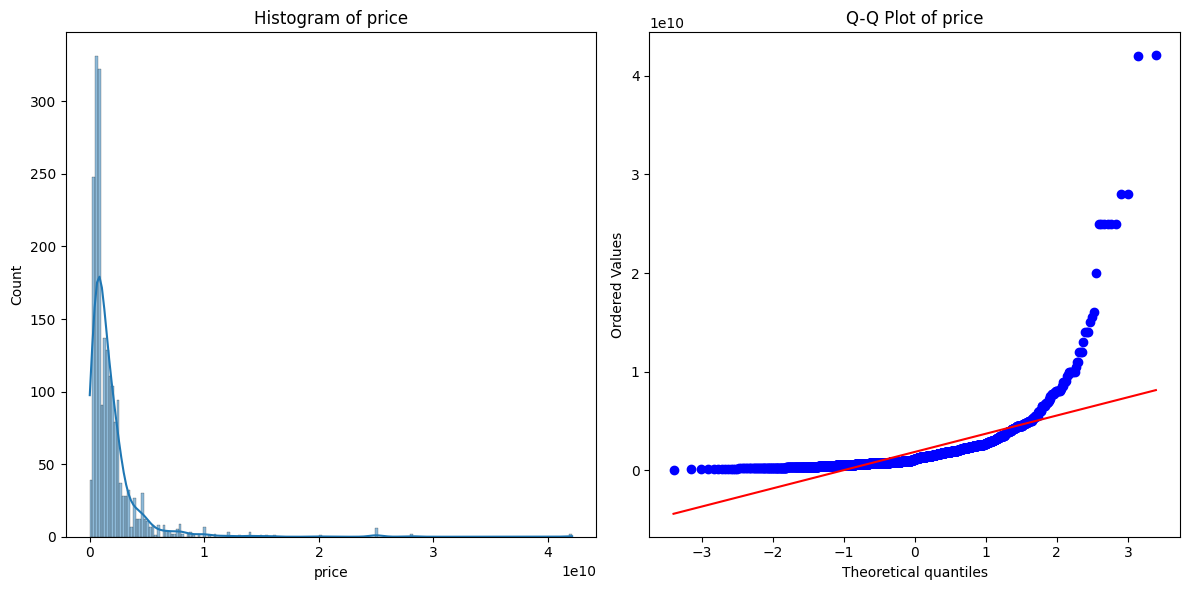

Shapiro-Wilk Test for surface_area: Statistics=0.3861241340637207, p-value=0.0
Kolmogorov-Smirnov Test for surface_area: Statistics=0.9999683287581669, p-value=0.0


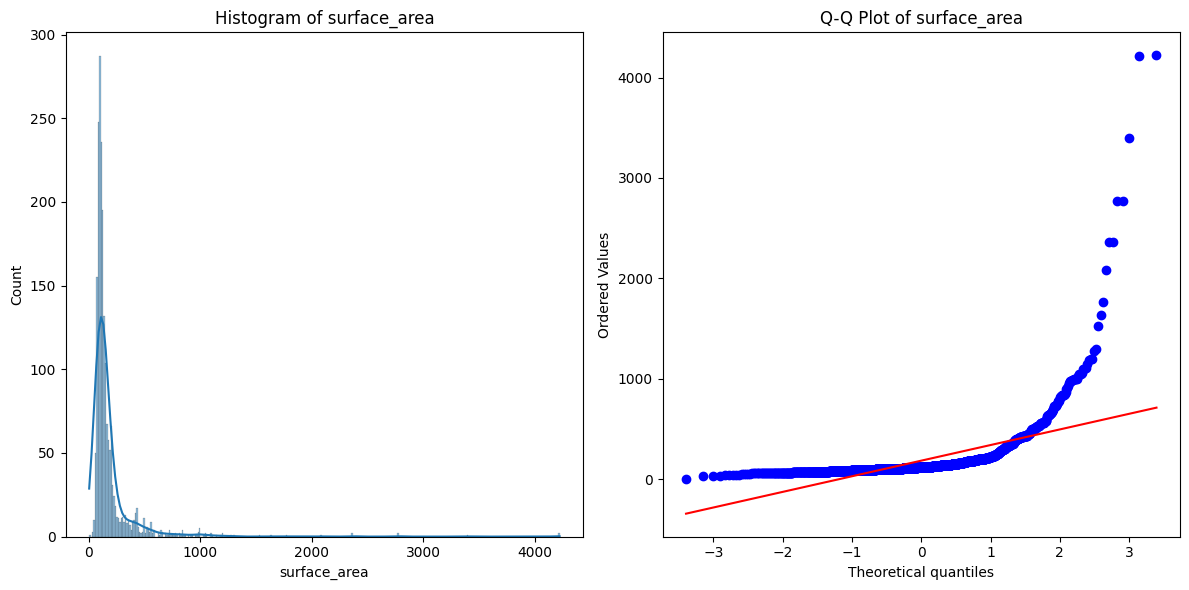

In [ ]:
# Uji Normalitas
columns_to_test = ['price', 'surface_area']

for column in columns_to_test:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    stat, p = kstest(df[column].dropna(), 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()

Shapiro-Wilk Test for bed: Statistics=0.4725208282470703, p-value=0.0
Kolmogorov-Smirnov Test for bed: Statistics=0.9658637294379594, p-value=0.0


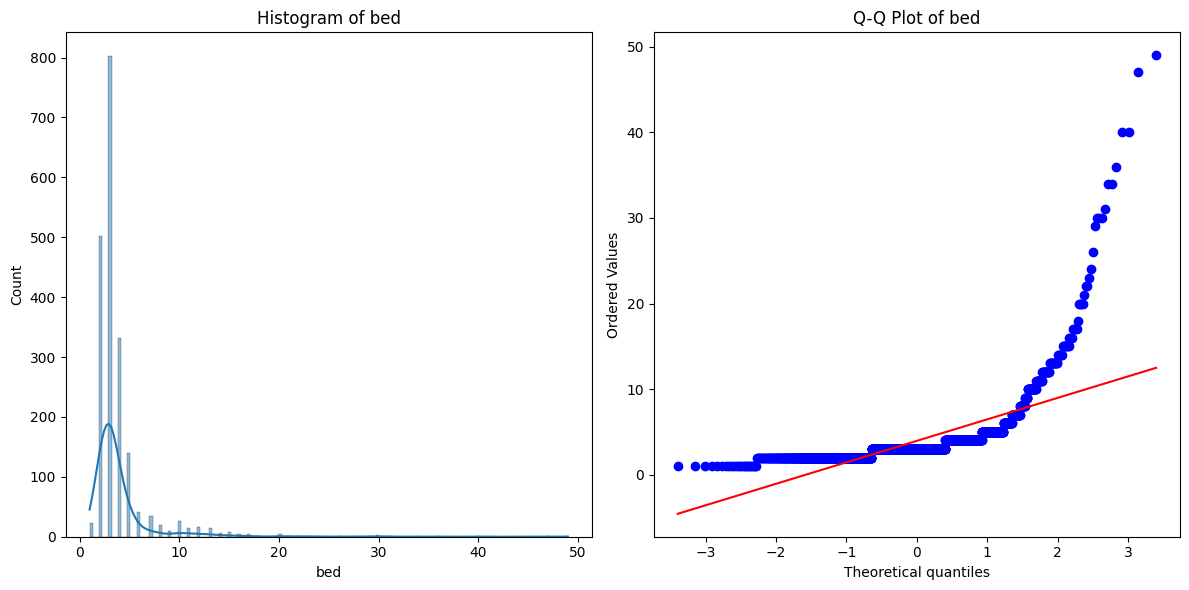

In [ ]:
# Uji Normalitas
columns_to_test = ['bed']

for column in columns_to_test:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    stat, p = kstest(df[column].dropna(), 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()

Shapiro-Wilk Test for bath: Statistics=0.4584779739379883, p-value=0.0
Kolmogorov-Smirnov Test for bath: Statistics=0.8413447460685429, p-value=0.0


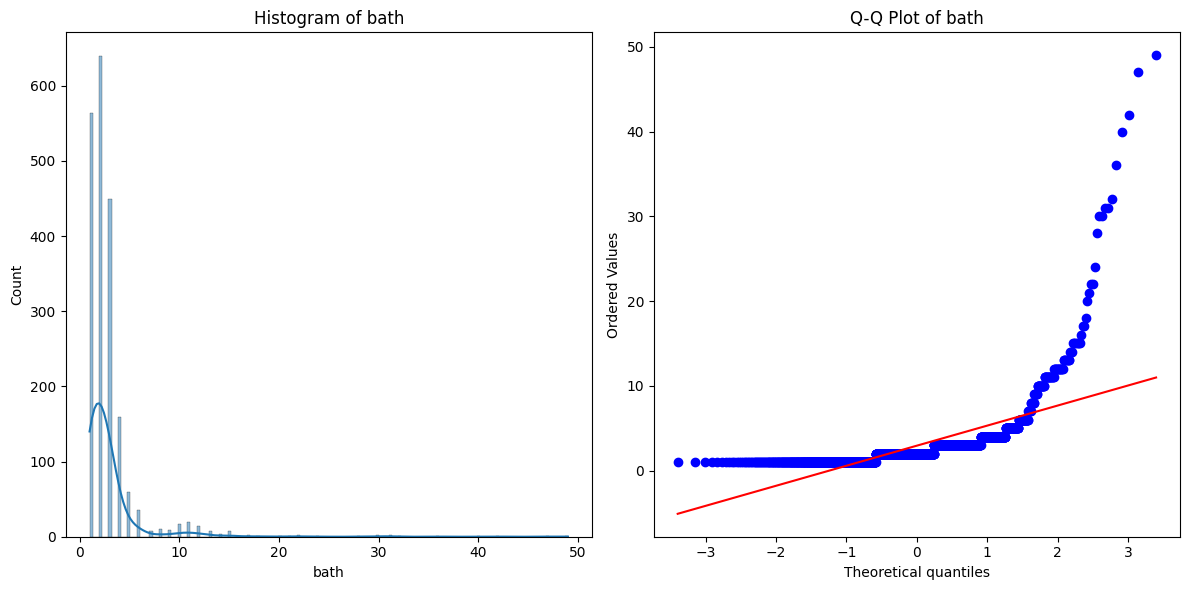

Shapiro-Wilk Test for carport: Statistics=0.424538791179657, p-value=0.0
Kolmogorov-Smirnov Test for carport: Statistics=0.8413447460685429, p-value=0.0


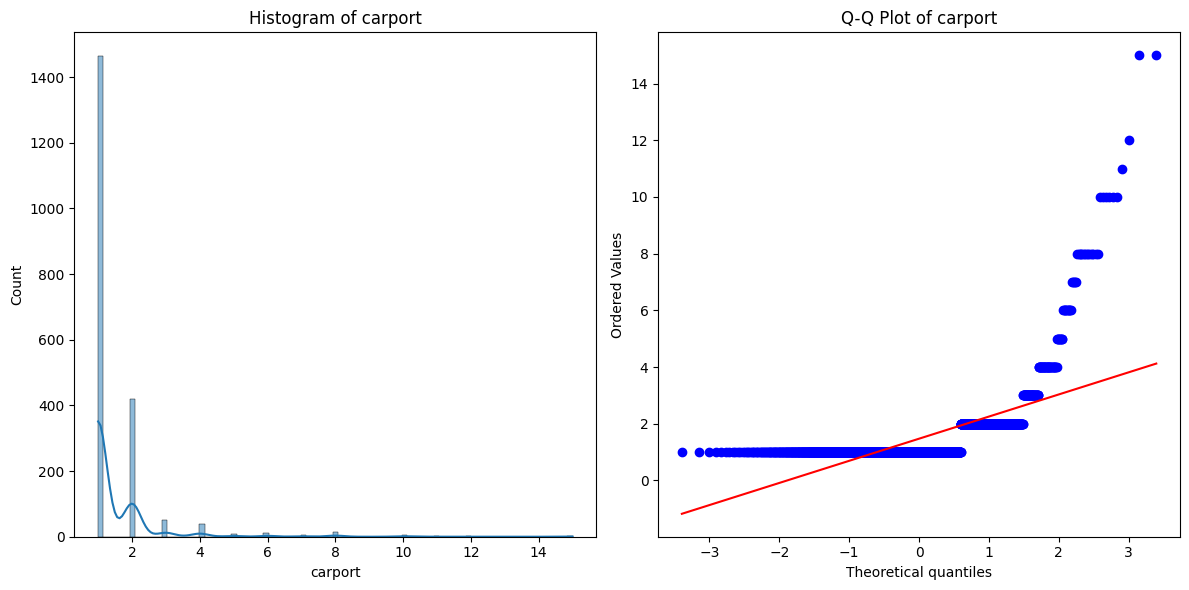

In [ ]:
# Uji Normalitas
columns_to_test = ['bath', 'carport']

for column in columns_to_test:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    stat, p = kstest(df[column].dropna(), 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()

### - Remove outliers from 5 specific columns in a dataset

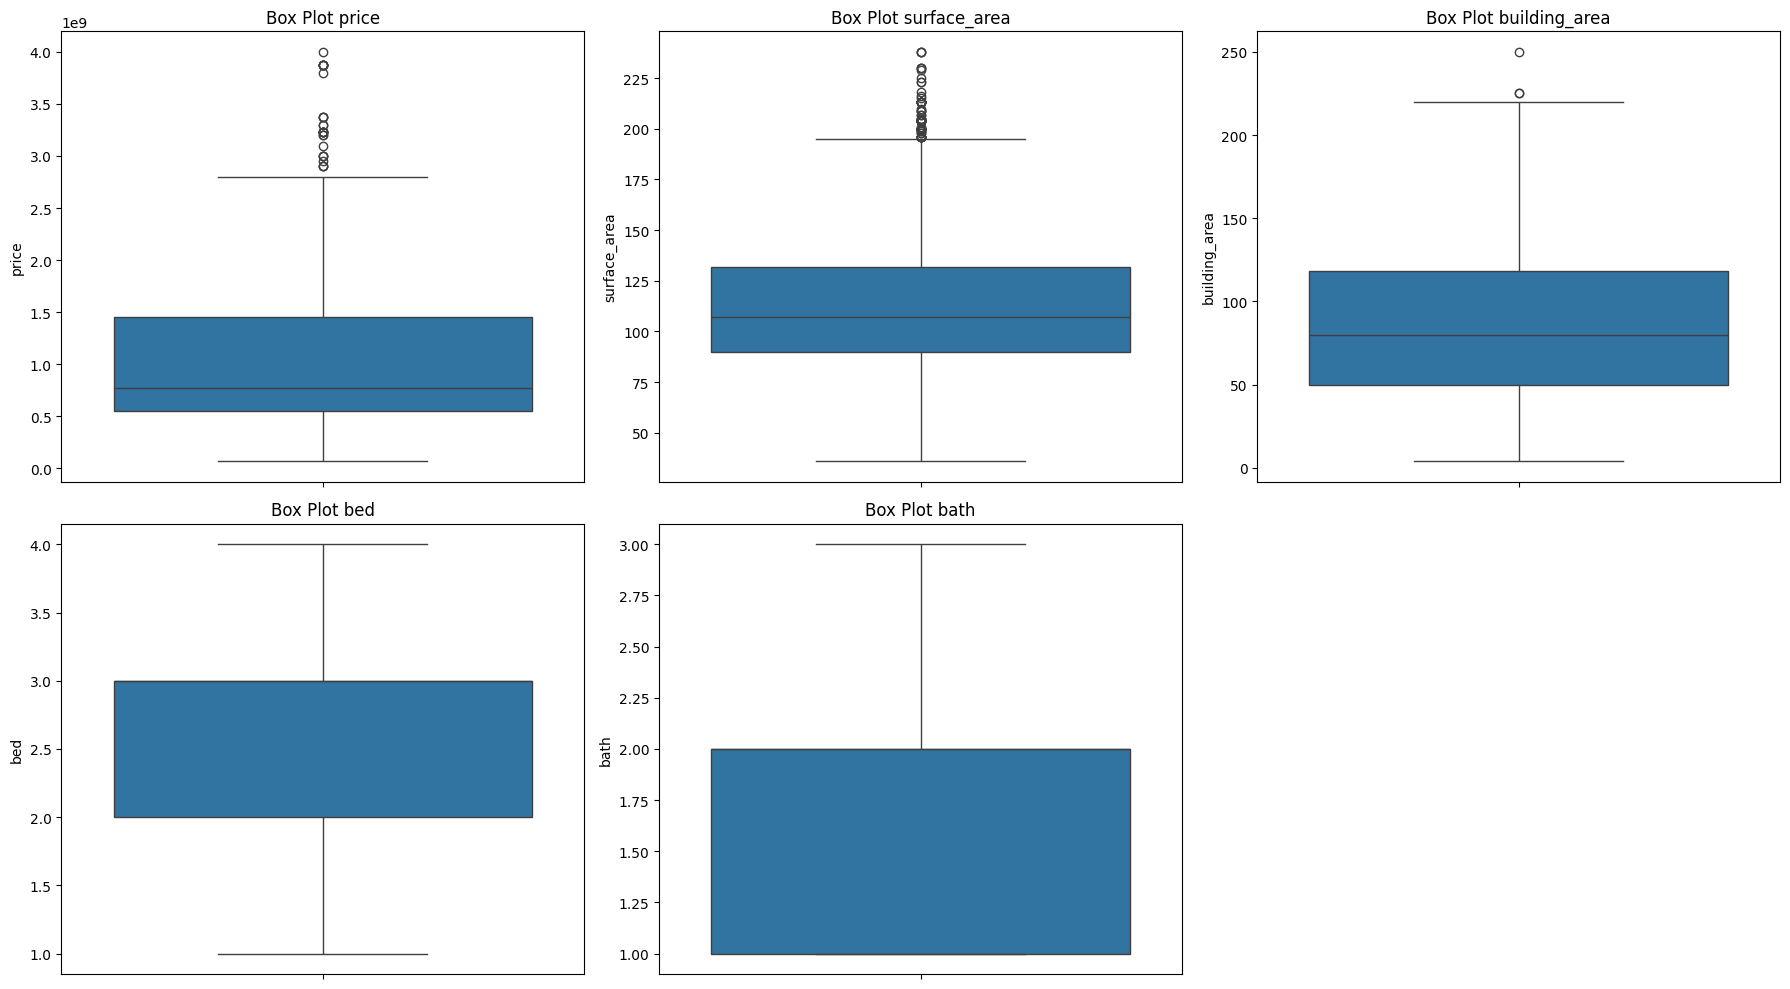

In [ ]:
# Mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier dari kolom yang relevan
columns_to_clean = ['price', 'surface_area', 'building_area', 'bed', 'bath']
for column in columns_to_clean:
    df = remove_outliers(df, column)

# Menampilkan box plot untuk memvisualisasikan outlier
plt.figure(figsize=(18, 10))

for i, column in enumerate(columns_to_clean, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot {column}')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

print(df.head)

<bound method NDFrame.head of              price  listing-location  bed  bath  carport  surface_area  \
0     1.790000e+09                39  3.0   3.0      2.0         120.0   
1     1.700000e+08                22  3.0   2.0      1.0         102.0   
2     6.950000e+08                 4  2.0   2.0      1.0         100.0   
3     5.600000e+08                50  3.0   1.0      1.0         109.0   
4     2.000000e+08                37  2.0   1.0      1.0          60.0   
...            ...               ...  ...   ...      ...           ...   
2015  5.000000e+08                23  3.0   2.0      2.0         104.0   
2016  7.500000e+08                13  2.0   1.0      1.0          89.0   
2017  7.560000e+08                39  2.0   1.0      2.0         140.0   
2018  1.780000e+09                12  4.0   3.0      2.0         118.0   
2019  2.300000e+09                61  4.0   3.0      1.0         200.0   

      building_area  
0             110.0  
1             126.0  
2             1

In [ ]:
df.to_csv('RumahYogya.csv', index=False)

# (D) Correlation

                     price  listing-location       bed      bath   carport  \
price             1.000000          0.024191  0.598917  0.734165  0.227780   
listing-location  0.024191          1.000000 -0.035835 -0.068215  0.025527   
bed               0.598917         -0.035835  1.000000  0.733045  0.193702   
bath              0.734165         -0.068215  0.733045  1.000000  0.210131   
carport           0.227780          0.025527  0.193702  0.210131  1.000000   
surface_area      0.689223          0.088068  0.533980  0.527917  0.202484   
building_area     0.752510         -0.023044  0.691811  0.717742  0.131690   

                  surface_area  building_area  
price                 0.689223       0.752510  
listing-location      0.088068      -0.023044  
bed                   0.533980       0.691811  
bath                  0.527917       0.717742  
carport               0.202484       0.131690  
surface_area          1.000000       0.604908  
building_area         0.604908       1.

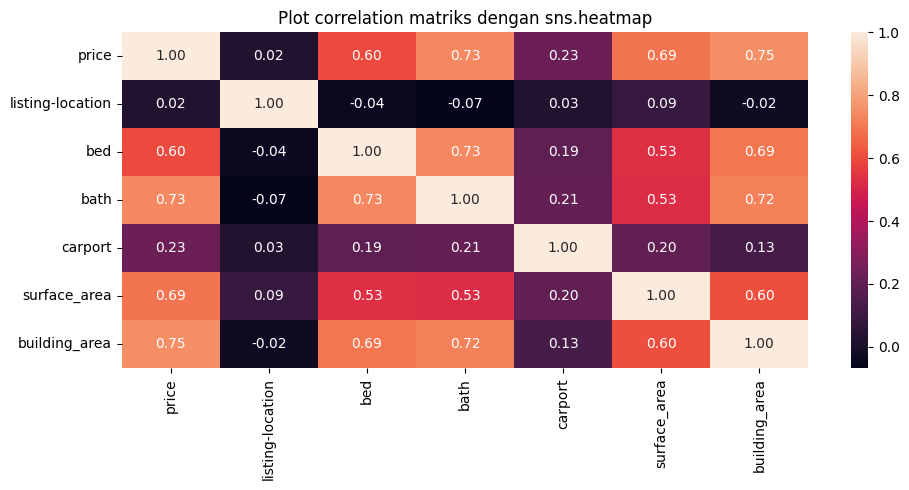

In [ ]:
# Melanjutkan analisis dan model prediksi
corr = df.corr()
print(df.corr())

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Plot correlation matriks dengan sns.heatmap')
plt.tight_layout()
plt.show()

<ipython-input-201-3eac8fc43200>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, ax=ax)


<Figure size 640x480 with 0 Axes>

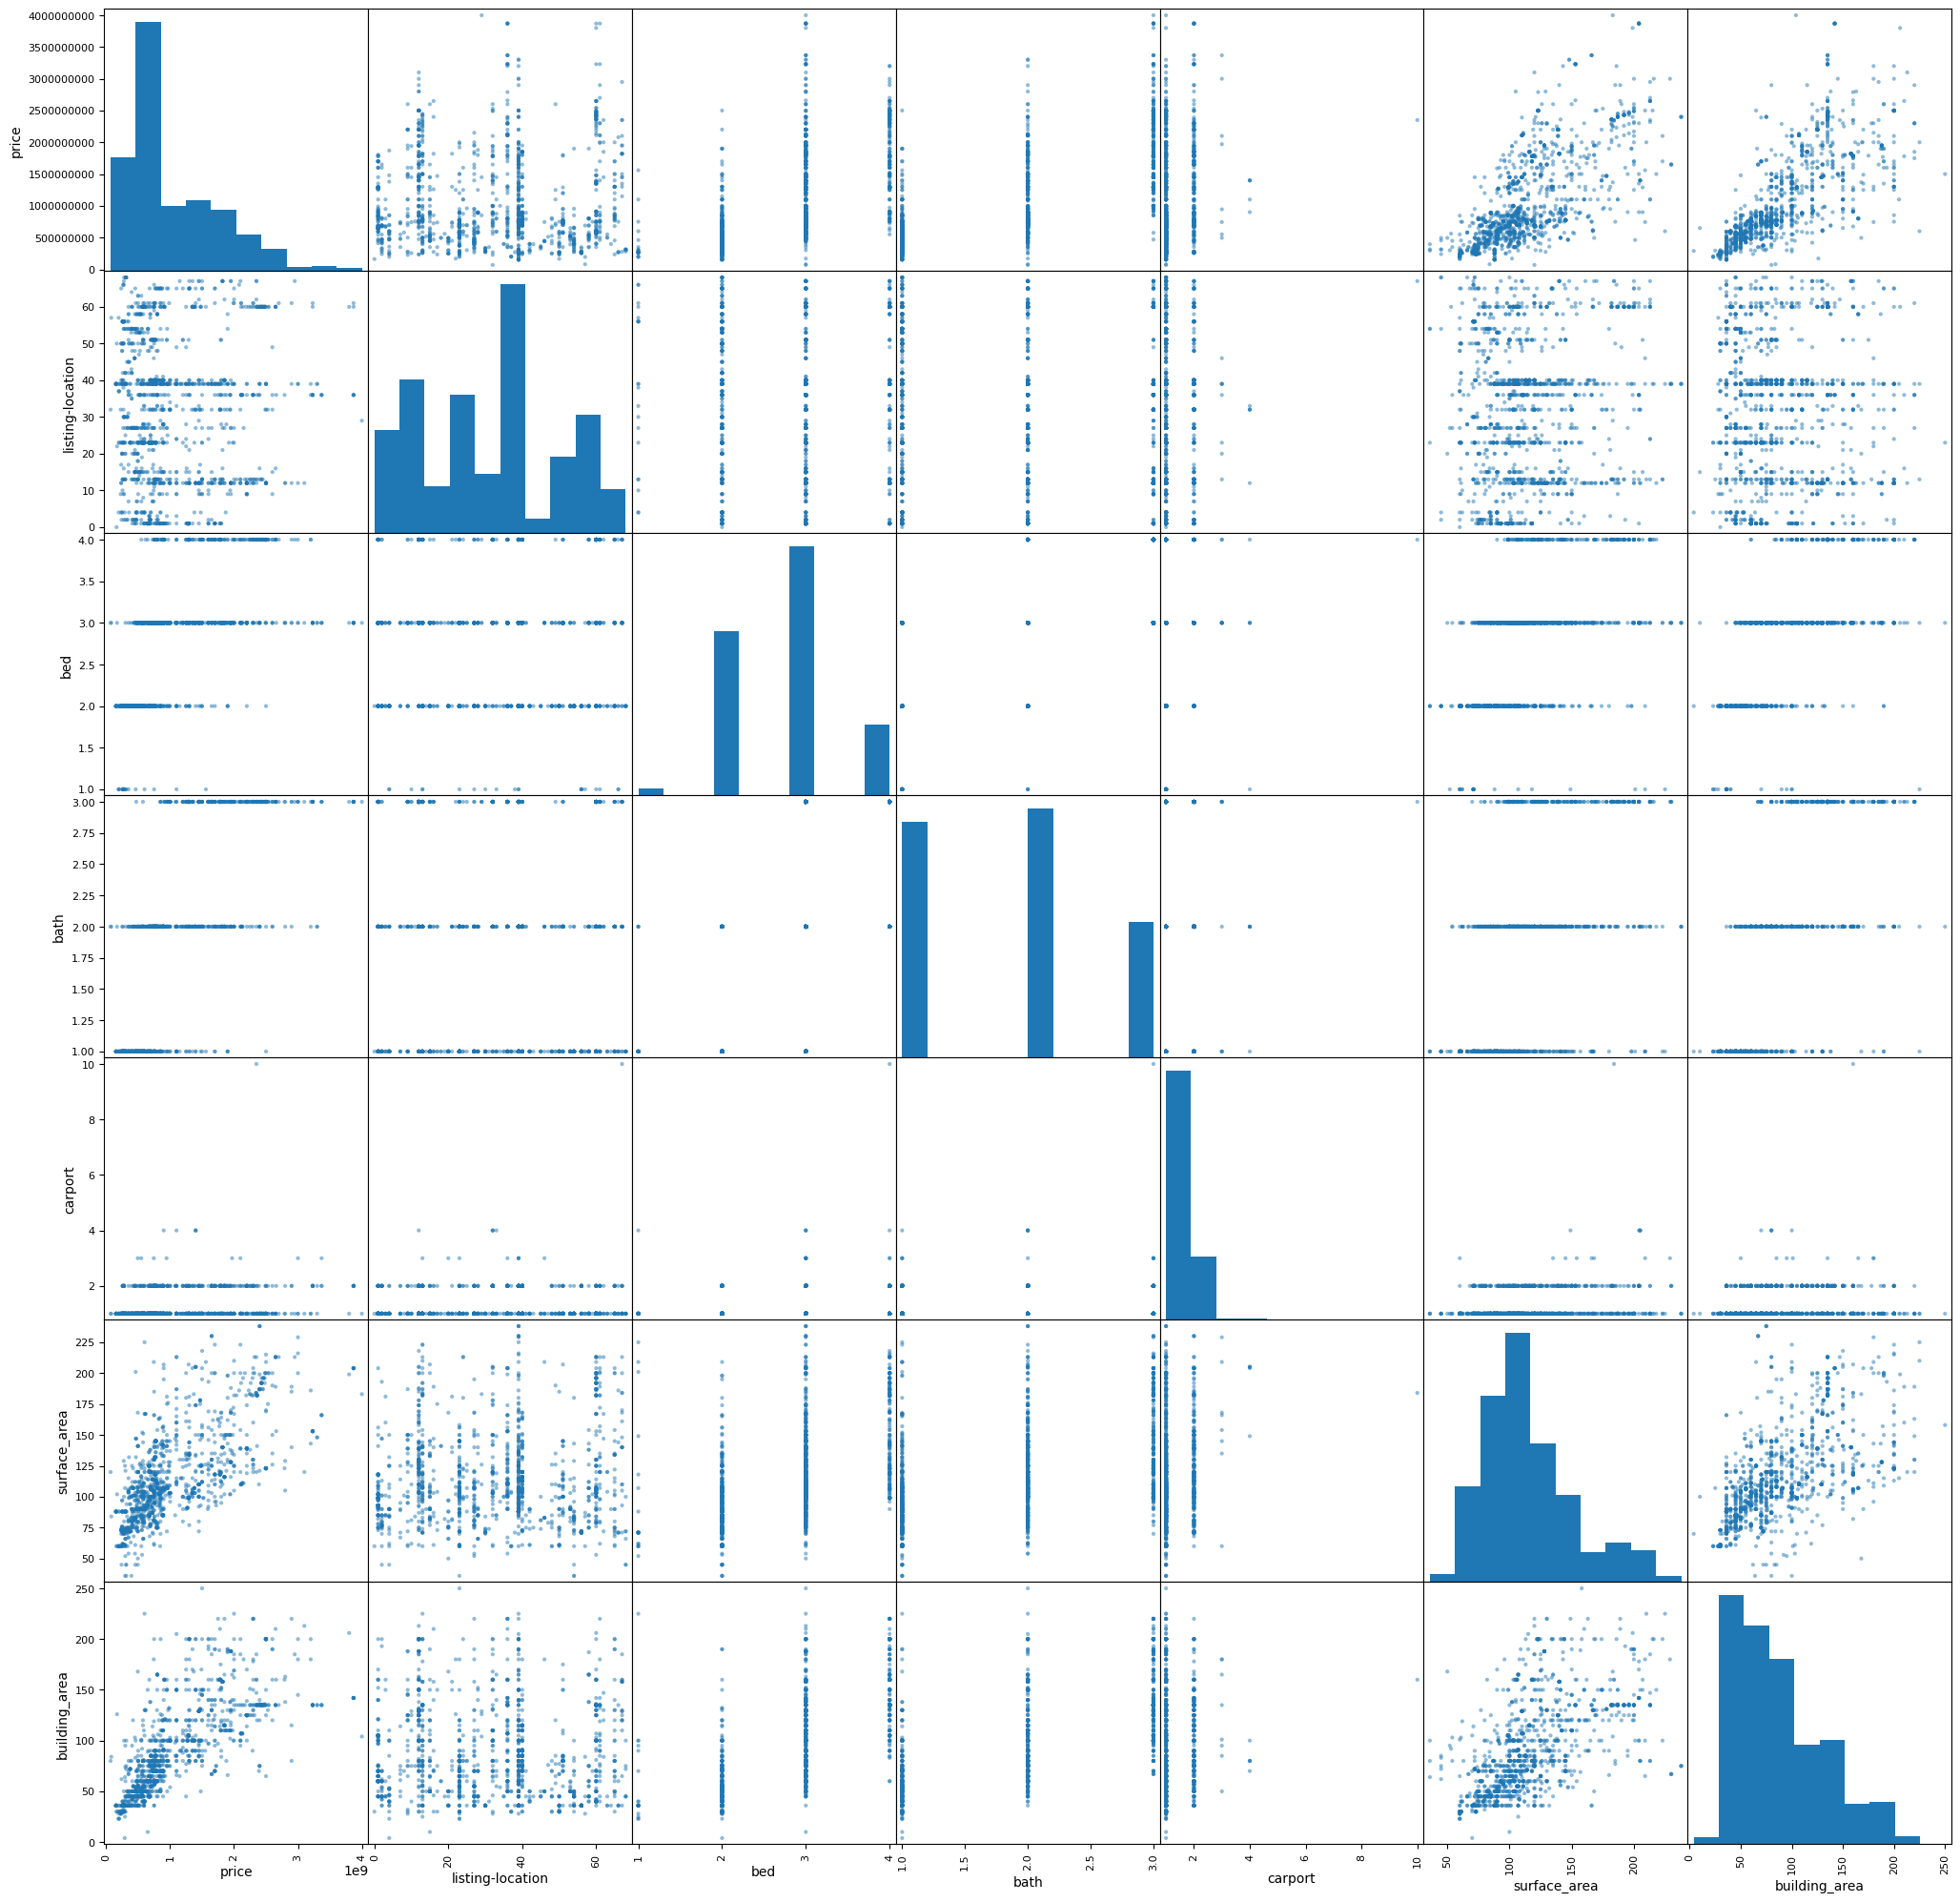

In [ ]:
#Korelasi keseluruhan antar kolom bernilai
plt.clf()

_, ax = plt.subplots(1, 1, figsize=(25,25))
scatter_matrix(df, ax=ax)
plt.show()

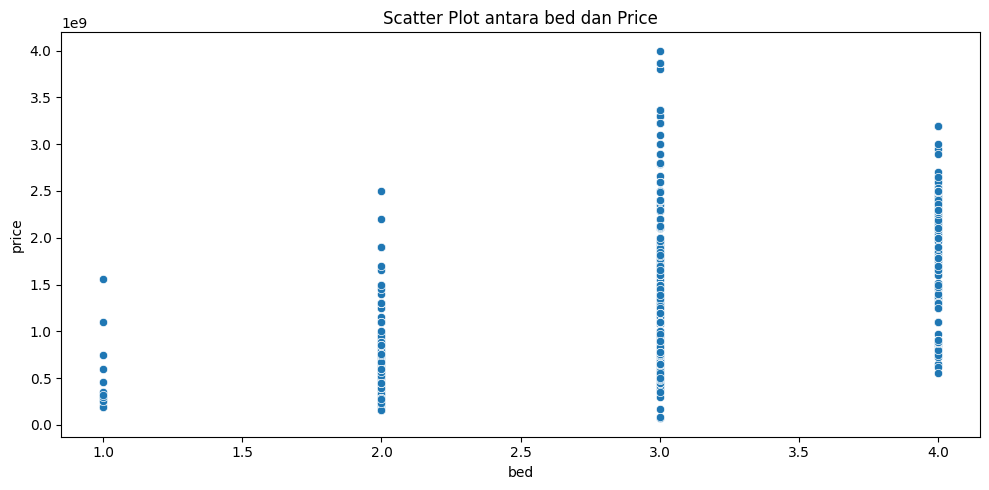

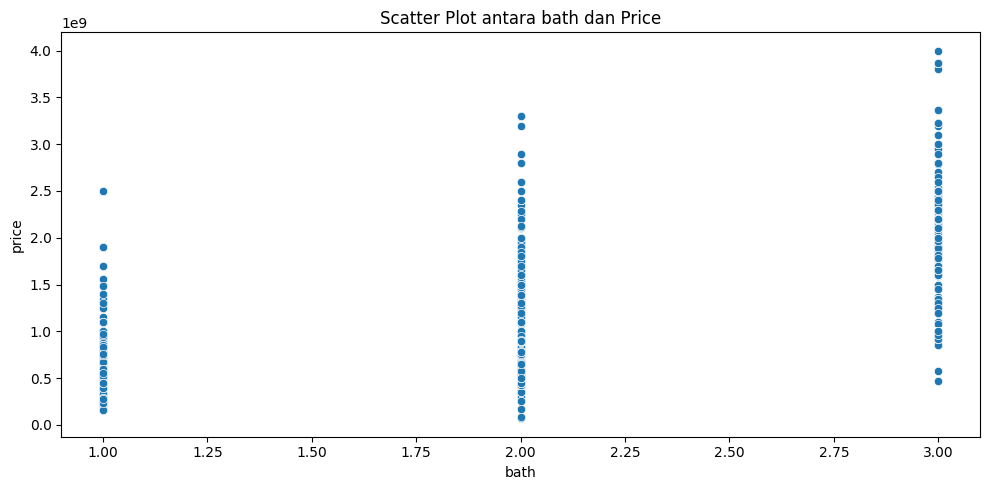

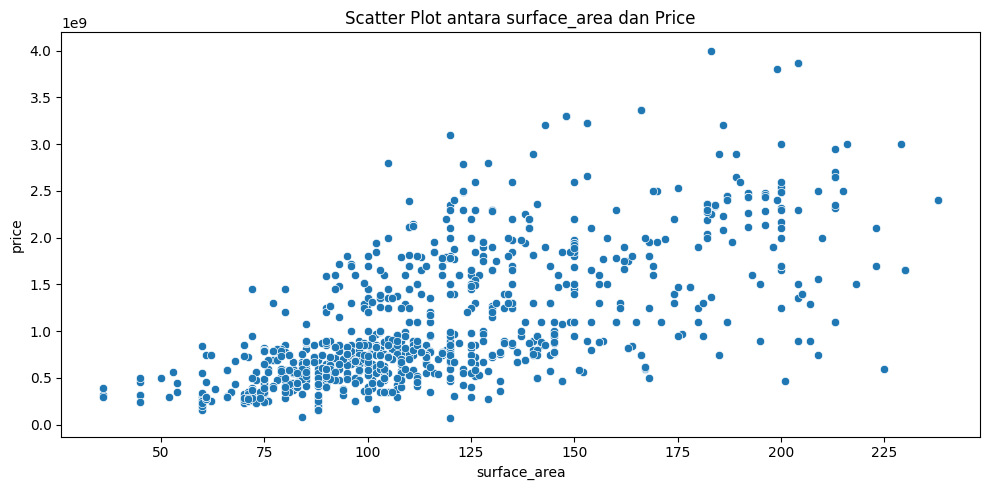

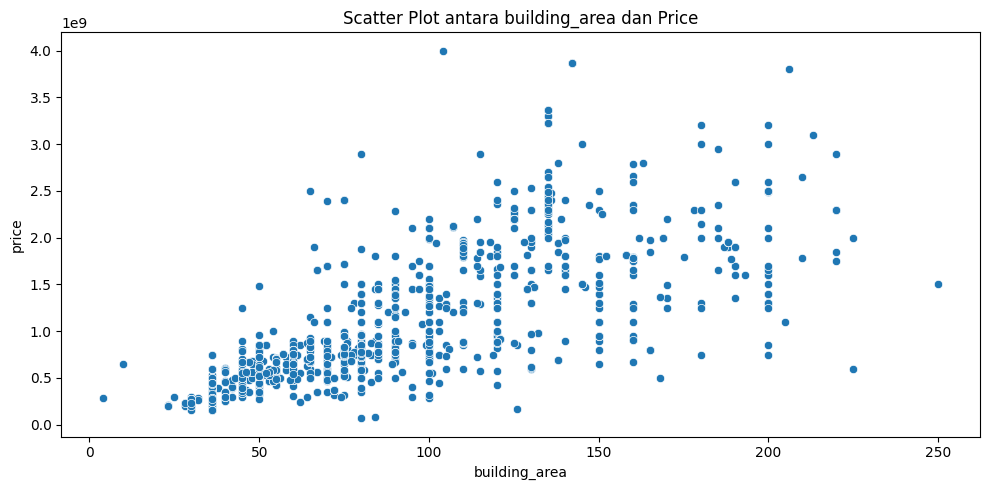

In [ ]:
# Menampilkan scatter plot untuk variabel dengan korelasi tinggi terhadap harga
high_corr = corr['price'][corr['price'].abs() > 0.5].index.drop('price')

for col in high_corr:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'Scatter Plot antara {col} dan Price')
    plt.tight_layout()
    plt.show()

# (E) Linear Regression

## 1. Using 4 Variable

In [ ]:
# Model 1: Using 'surface_area', 'building_area', 'bed', 'bath'
X1 = df[['surface_area', 'building_area', 'bed', 'bath']]
y1 = df['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100)

In [ ]:
print(X1_train.shape)
print(X1_test.shape)

(1171, 4)
(293, 4)


In [ ]:
regr1 = LinearRegression()
regr1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
print('Model 1 - intercept:', regr1.intercept_)
print('Model 1 - Coef:', regr1.coef_)

Model 1 - intercept: -537133049.4532876
Model 1 - Coef: [ 6.31983048e+06  5.72623201e+06 -1.09399280e+08  3.55867226e+08]


In [ ]:
pred1 = regr1.predict(X1_test)
rmse1 = np.sqrt(mean_squared_error(y1_test, pred1))
r2_1 = r2_score(y1_test, pred1)
mape1 = mean_absolute_percentage_error(y1_test, pred1) * 100  # Convert MAPE to percentage
print('Model 1 - RMSE:', rmse1)
print('Model 1 - R2 Score:', r2_1)
print('Model 1 - MAPE:', mape1, '%')

Model 1 - RMSE: 414129327.7353847
Model 1 - R2 Score: 0.6610017895644853
Model 1 - MAPE: 31.091648567113218 %


## 2. Using 3 Variable

In [ ]:
# Model 2: Using 'surface_area', 'building_area', 'bath'
X2 = df[['surface_area', 'building_area', 'bath']]
y2 = df['price']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)

In [ ]:
print(X2_train.shape)
print(X2_test.shape)

(1171, 3)
(293, 3)


In [ ]:
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
print('Model 2 - intercept:', regr2.intercept_)
print('Model 2 - Coef:', regr2.coef_)

Model 2 - intercept: -683664249.0169601
Model 2 - Coef: [6.08074713e+06 5.21660951e+06 3.09558951e+08]


In [ ]:
pred2 = regr2.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))
r2_2 = r2_score(y2_test, pred2)
mape2 = mean_absolute_percentage_error(y2_test, pred2) * 100  # Convert MAPE to percentage
print('Model 2 - RMSE:', rmse2)
print('Model 2 - R2 Score:', r2_2)
print('Model 2 - MAPE:', mape2, '%')

Model 2 - RMSE: 414388481.36038023
Model 2 - R2 Score: 0.6605773805820898
Model 2 - MAPE: 30.71840475647122 %


## 3. Using 2 Variable

In [ ]:
# Model 3: Using 'building_area', 'bath'
X3 = df[['building_area', 'bath']]
y3 = df['price']

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=100)

In [ ]:
print(X3_train.shape)
print(X3_test.shape)

(1171, 2)
(293, 2)


In [ ]:
regr3 = LinearRegression()
regr3.fit(X3_train, y3_train)

LinearRegression()

In [ ]:
print('Model 3 - intercept:', regr3.intercept_)
print('Model 3 - Coef:', regr3.coef_)

Model 3 - intercept: -304553714.3478503
Model 3 - Coef: [7.48231769e+06 3.75328867e+08]


In [ ]:
pred3 = regr3.predict(X3_test)
rmse3 = np.sqrt(mean_squared_error(y3_test, pred3))
r2_3 = r2_score(y3_test, pred3)
mape3 = mean_absolute_percentage_error(y3_test, pred3) * 100  # Convert MAPE to percentage
print('Model 3 - RMSE:', rmse3)
print('Model 3 - R2 Score:', r2_3)
print('Model 3 - MAPE:', mape3, '%')

Model 3 - RMSE: 456916067.5779953
Model 3 - R2 Score: 0.5873343769642885
Model 3 - MAPE: 33.38056263306514 %


## 4. Testing Using 10 Data

In [ ]:
# Contoh actual dan prediksi untuk 10 data
sample_data = df.sample(10, random_state=42)
sample_X1 = sample_data[['surface_area', 'building_area', 'bed', 'bath']]  # Untuk Model 1
sample_X2 = sample_data[['surface_area', 'building_area', 'bath']]         # Untuk Model 2
sample_X3 = sample_data[['building_area', 'bath']]                         # Untuk Model 3

sample_actual = sample_data['price'].values
sample_pred1 = regr1.predict(sample_X1)
sample_pred2 = regr2.predict(sample_X2)
sample_pred3 = regr3.predict(sample_X3)

print("\nContoh Actual dan Prediksi Harga untuk 10 Data:")
for i in range(10):
    print(f"Data ke-{i+1}:")
    print(f"Actual Price: {sample_actual[i]}")
    print(f"Prediksi Model 1: {sample_pred1[i]}")
    print(f"Prediksi Model 2: {sample_pred2[i]}")
    print(f"Prediksi Model 3: {sample_pred3[i]}\n")


Contoh Actual dan Prediksi Harga untuk 10 Data:
Data ke-1:
Actual Price: 407000000.0
Prediksi Model 1: 363202495.47794473
Prediksi Model 2: 347101900.4925449
Prediksi Model 3: 407479448.4979923

Data ke-2:
Actual Price: 2600000000.0
Prediksi Model 1: 2128830162.6332345
Prediksi Model 2: 2148280480.63845
Prediksi Model 3: 2243073246.8803964

Data ke-3:
Actual Price: 898000000.0
Prediksi Model 1: 787393386.474206
Prediksi Model 2: 821800512.8420148
Prediksi Model 3: 932454669.2116897

Data ke-4:
Actual Price: 615000000.0
Prediksi Model 1: 1290358188.2024047
Prediksi Model 2: 1319538709.6464908
Prediksi Model 3: 1043476451.7472856

Data ke-5:
Actual Price: 550000000.0
Prediksi Model 1: 394801647.8930465
Prediksi Model 2: 377505636.1610937
Prediksi Model 3: 407479448.4979923

Data ke-6:
Actual Price: 475000000.0
Prediksi Model 1: 455031960.3563268
Prediksi Model 2: 433992419.38971305
Prediksi Model 3: 444891036.9244213

Data ke-7:
Actual Price: 235000000.0
Prediksi Model 1: 233070201.9522